In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=sns.load_dataset('iris')

# 분석을 위한 데이터처리

## Train/Test set 분할하기

In [2]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
y =data['species'] # Y target 을 species 로 잡겠다.(classification)
X =data.drop('species',axis=1) # x 변수는 species 를 제외한 나머지

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=42)
# X_train, X_test, y_train, y_test 의 순서가 중요하다. 
# train_size : train set 의 size 비율을 얼마나 잡을것인가. 대게 0.7~0.8 을 잡는다.
# random_state : 다시 실행해도 결과를 같게하기 위해 random_state 를 설정한다.

# classification 성능평가

## confusion_matrix(y_true, y_pred)

confusion matrix : 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다. <br>
- 즉 diagonal 에 있는 수는 예측을 잘 한 경우이다
- 사이킷런 패키지에서 제공하는 confusion_matrix 명령을 사용할 때는 클래스 순서가 0, 1, 2, ... 순서로 출력되기때문에 주의하자

In [21]:
y_true = [1, 1, 2, 3, 3, 3, 3]
y_pred = [1, 1, 2, 2, 2, 3, 3]

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 1, 0],
       [0, 2, 2]], dtype=int64)

즉 참값이 3 일때에 이 모델은 예측을 못 하고 있음을 볼 수 있다.

## accuracy_score(y_true, y_pred)

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다

In [26]:
y_true = [1, 1, 2, 2, 2]
y_pred = [1, 1, 2, 2, 3]

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.8

## precision_score(y_true, y_pred)

A class 라고 예측한 것들 중 실제로 A class 인 것의 비율

그래서 TEST 의" '정확도' score 라고 한다.

hyper parameter 

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균

In [13]:
y_true = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

y_pred = [1, 1, 1, 2, 2, 1, 2, 2, 2, 3]

In [15]:
# averge =None 을 해야 multi label 에서 작동한다.
# 원래 precision_score 는 이진분류 (양성,음성) 에서 만들어진 score 라 지금경우 label 이 3개인 경우 3개의 값을 나타낸가.
from sklearn.metrics import precision_score
precision_score(y_true,y_pred,average=None)

array([0.75, 0.4 , 1.  ])

In [16]:
precision_score(y_true,y_pred,average='weighted')

0.745

## recall_score(y_true, y_pred)

실제 A 클래스에 속한 표본 중에 A 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다.

그래서 test 의 '재현율' 이라고 한다. 실제 클래스의 값들을 모두 뽑아내는지에 대한 score 이다.

In [17]:
y_true = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
f1_score(y_true, y_pred)
y_pred = [1, 1, 1, 2, 2, 1, 2, 2, 2, 3]

In [18]:
from sklearn.metrics import recall_score
recall_score(y_true,y_pred,average=None)

array([1.        , 0.66666667, 0.25      ])

In [20]:
recall_score(y_true,y_pred,average='weighted')

0.6

## F1_score(y_true, y_pred)

정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다.

F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있습니다

베타가 1인 경우를 특별히 F1점수라고 한다. F1=2⋅precision⋅recall/(precision+recall)

높을수록 좋음

In [50]:
y_true = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]

y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [53]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred, average='weighted')

0.7363636363636363

In [54]:
y_true = [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]

y_pred = [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]

In [55]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred,average='weighted')

0.8371212121212122

In [56]:
# 위와 같이 틀린 횟수는 똑같지만, 적은 데이터데 대해 작 예측할때 f1 score 가 높은것을 볼 수 있습니다.

## classification_report(y_true, y_pred)

In [57]:
y_true = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

y_pred = [1, 1, 1, 2, 2, 1, 2, 2, 2, 3]

In [59]:
from sklearn.metrics import classification_report

class_name = ['class 1', 'class 2', 'class 3']

print( classification_report(y_true,y_pred, target_names= class_name ) )

              precision    recall  f1-score   support

     class 1       0.75      1.00      0.86         3
     class 2       0.40      0.67      0.50         3
     class 3       1.00      0.25      0.40         4

    accuracy                           0.60        10
   macro avg       0.72      0.64      0.59        10
weighted avg       0.74      0.60      0.57        10



# 모형 최적화(Hyperparameter)

## GridSearchCV

### 단일 parameter 

In [1]:
# 데이터 생성
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [20]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alphas = np.linspace(1, 500, 200) # 추정하려는 parameter 범위
parameters = {'alpha': alphas } # 추정하려는 parameter(이때 이름은 모델의 parameter default 이름과 똑같이 넣어야 한다.)

model = GridSearchCV(estimator = ridge, param_grid = parameters, scoring='neg_mean_squared_error',cv=5)
# estimator : 모델
# param_grid : 추정하고싶은 파라미터 이름(str)을 key 로. lists of parameter settings 을 value 로 하는 dictionary
# scoring : evaluate the predictions on the test set
#         : (default) model 이 가지고있는 default evaluation criterion 를 쓴다
#         : model has score method providing a default evaluation criterion for the problem they are designed to solve 
#         : ‘accuracy’ = metrics.accuracy_score (classification)
#         : ‘r2’ = metrics.r2_score (regression)
#         : ‘neg_mean_squared_error’ : metrics.mean_squared_error (regression)
#         : 자세한건 scoring parameter 
# cv : k-fold validation 에서 k
#    : (default)3-fold cross validation
model.fit(X,y)
# fitting 을 해야 위에서 설정한 객체가 그대로 적용이 되면서 비로소 best 한 parameter 를 찾아준다.

print(model.best_params_) # 우리가 추정한 best parameter
print(model.best_score_) # 우리가 지정한 scoring 에 기반한 제일 좋은 score


{'alpha': 151.45226130653265}
-29.753677540045423


In [27]:
# CV result 분석

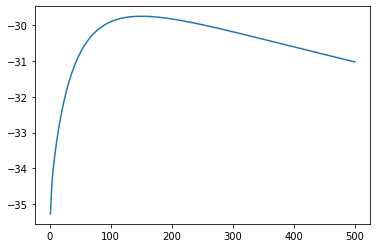

In [25]:
result = pd.DataFrame(model.cv_results_)[['param_alpha','mean_test_score']]
plt.plot('param_alpha','mean_test_score',data=result,)

In [26]:
print(model.best_params_) # 우리가 추정한 best parameter
print(model.best_score_) # 우리가 지정한 scoring 에 기반한 제일 좋은 score

{'alpha': 151.45226130653265}
-29.753677540045423


In [50]:
# (note)
# 근데 왜 mse 가 음수인가요? 
# 사이킷런의 교차 검증 기능은 scoring 매개변수에 (낮을수록 좋은) 비용 함수가 아니라 (클수록 좋은) 효용 함수를 기대합니다. 
# 그래서 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수를 사용

### 여러개 parameter 

In [45]:
#데이터 생성
data=sns.load_dataset('iris')
y =data['species'] # Y target 을 species 로 잡겠다.(classification) # 이 때에 1dim array 로 해주어야한다.
X =data.drop('species',axis=1) # x 변수는 species 를 제외한 나머지
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=42)

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

scv = SVC()
param_grid ={'C' : [0.001,0.01,0.1,1,10,100], 'gamma' : [0.001,0.01,0.1,1,10,100] }
model = GridSearchCV(scv,param_grid,cv=5)
# scoring 은 default 이므로 model 의 자체 scoring 을 이용해 최적화를 하게 된다. 
# 이제 model=GridSearchCV 는 GridSearch 를 통해 최적화된 parameter 를 이용한 scv model 이 합쳐진 것이 된다. 
model.fit(X,y)
print(model.best_params_) # 우리가 추정한 best parameter
print(model.best_score_) # 우리가 지정한 scoring 에 기반한 제일 좋은 score

NameError: name 'X' is not defined